In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import pickle   

In [3]:
with open('data_df_states.pkl', 'rb') as f: 
    data_df = pickle.load(f)
data_df

,COMMENT,ORIGINATOR,NORAD_CAT_ID,OBJECT_NAME,OBJECT_TYPE,CLASSIFICATION_TYPE,INTLDES,EPOCH,EPOCH_MICROSECONDS,MEAN_MOTION,...,PERIOD,APOGEE,PERIGEE,DECAYED,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z
0,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2025-02-19 04:33:04,103712,15.50287953,...,92.886,418.859,412.914,0,-6716.464805,1010.498823,-0.619780,-0.702872,-4.703268,6.012037
1,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2025-02-18 16:10:27,894144,15.50261374,...,92.888,418.933,412.995,0,-6754.588368,713.612739,-5.372314,-0.499248,-4.729156,6.011959
2,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2025-02-18 13:04:48,719712,15.50255355,...,92.888,418.937,413.027,0,-6762.257478,637.531540,-4.332367,-0.445122,-4.734508,6.011920
3,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2025-02-18 13:04:48,719712,15.50255355,...,92.888,418.937,413.027,0,-6762.257478,637.531540,-4.332367,-0.445122,-4.734508,6.011920
4,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2025-02-18 08:50:51,404064,15.50242656,...,92.889,418.777,413.261,0,285.606563,-4232.873367,5299.590150,7.641703,-0.169388,-0.542461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2020-03-23 10:40:36,430176,15.48912972,...,92.968,423.263,416.551,0,-5295.206939,-2989.852258,3032.774513,0.457275,-5.842257,-4.935927
9996,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2020-03-23 09:11:35,60352,15.48913193,...,92.968,423.263,416.549,0,-4983.780044,-4262.942739,1789.202874,2.020125,-4.753728,-5.657020
9997,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2020-03-23 05:13:34,135680,15.48910863,...,92.969,423.309,416.517,0,5263.249851,2396.722319,-3580.001735,0.186781,6.222535,4.452753
9998,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2020-03-23 05:13:34,135680,15.48910863,...,92.969,423.309,416.517,0,5263.249851,2396.722319,-3580.001735,0.186781,6.222535,4.452753


Drop Rows with Missing State Vectors. Can't train/analyze with NAANs.
Drop Name Values

In [13]:
data_df_dropped = data_df.dropna(subset=['position_x', 'position_y', 'position_z', 'velocity_x', 'velocity_y', 
                                         'velocity_z'])
def drop_single_value_columns(df):
    temp = []
    for col in df.columns:
        if len(df[col].unique())<2:
            temp.append(col)
    df = df.drop(columns=temp)
    return df
data_df_dropped = drop_single_value_columns(data_df_dropped)
data_df_dropped

,EPOCH,EPOCH_MICROSECONDS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,...,SEMIMAJOR_AXIS,PERIOD,APOGEE,PERIGEE,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z
0,2025-02-19 04:33:04,103712,15.50287953,0.0004375,51.6362,171.4481,335.7698,24.3085,49686,0.00041201,...,6794.022,92.886,418.859,412.914,-6716.464805,1010.498823,-0.619780,-0.702872,-4.703268,6.012037
1,2025-02-18 16:10:27,894144,15.50261374,0.000437,51.6362,174.005,333.8498,26.227,49678,0.00033537,...,6794.099,92.888,418.933,412.995,-6754.588368,713.612739,-5.372314,-0.499248,-4.729156,6.011959
2,2025-02-18 13:04:48,719712,15.50255355,0.0004349,51.6363,174.6431,332.4152,27.6605,49676,0.0003415,...,6794.117,92.888,418.937,413.027,-6762.257478,637.531540,-4.332367,-0.445122,-4.734508,6.011920
3,2025-02-18 13:04:48,719712,15.50255355,0.0004349,51.6363,174.6431,332.4152,27.6605,49676,0.0003415,...,6794.117,92.888,418.937,413.027,-6762.257478,637.531540,-4.332367,-0.445122,-4.734508,6.011920
4,2025-02-18 08:50:51,404064,15.50242656,0.000406,51.6389,175.5124,333.0365,122.1476,49673,0.00030289,...,6794.154,92.889,418.777,413.261,285.606563,-4232.873367,5299.590150,7.641703,-0.169388,-0.542461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020-03-23 10:40:36,430176,15.48912972,0.0004937,51.6446,52.7127,46.5882,98.6053,21872,0.000032484,...,6798.042,92.968,423.263,416.551,-5295.206939,-2989.852258,3032.774513,0.457275,-5.842257,-4.935927
9996,2020-03-23 09:11:35,60352,15.48913193,0.0004938,51.6445,53.0191,46.5566,113.6882,21871,0.000034984,...,6798.041,92.968,423.263,416.549,-4983.780044,-4262.942739,1789.202874,2.020125,-4.753728,-5.657020
9997,2020-03-23 05:13:34,135680,15.48910863,0.0004996,51.6447,53.8368,44.9382,273.0309,21868,0.000025424,...,6798.048,92.969,423.309,416.517,5263.249851,2396.722319,-3580.001735,0.186781,6.222535,4.452753
9998,2020-03-23 05:13:34,135680,15.48910863,0.0004996,51.6447,53.8368,44.9382,273.0309,21868,0.000025424,...,6798.048,92.969,423.309,416.517,5263.249851,2396.722319,-3580.001735,0.186781,6.222535,4.452753


Convert datetime to UNIX time

In [ ]:
data_df_dropped['EPOCH']=pd.to_datetime(data_df_dropped['EPOCH']) #ensure datetime
#convert epoch to unix timestamp for later normalization
data_df_dropped['UNIX_TIMESTAMP'] = data_df_dropped['EPOCH'].apply(lambda x: x.timestamp())
data_df = data_df_dropped.drop(columns=['EPOCH', 'TLE_LINE1', 'TLE_LINE2'])

#compute magnitudes and changes to velocity and position vectors
data_df['position_magnitude'] = np.linalg.norm(data_df[['position_x', 'position_y', 'position_z']].values,axis=1)
data_df['velocity_magnitude'] = np.linalg.norm(data_df[['velocity_x', 'velocity_y', 'velocity_z']].values,axis=1)
data_df['delta_position'] = data_df['position_magnitude'].diff()
data_df['delta_velocity'] = data_df['velocity_magnitude'].diff()
data_df = data_df.dropna() #drop NAANs just in case
data_df

,EPOCH_MICROSECONDS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,...,position_y,position_z,velocity_x,velocity_y,velocity_z,UNIX_TIMESTAMP,position_magnitude,velocity_magnitude,delta_position,delta_velocity
1,894144,15.50261374,0.000437,51.6362,174.005,333.8498,26.227,49678,0.00033537,0.0001891,...,713.612739,-5.372314,-0.499248,-4.729156,6.011959,1.739895e+09,6792.181978,7.665365,0.127228,-0.000100
2,719712,15.50255355,0.0004349,51.6363,174.6431,332.4152,27.6605,49676,0.0003415,0.00019261,...,637.531540,-4.332367,-0.445122,-4.734508,6.011920,1.739884e+09,6792.244948,7.665304,0.062970,-0.000061
3,719712,15.50255355,0.0004349,51.6363,174.6431,332.4152,27.6605,49676,0.0003415,0.00019261,...,637.531540,-4.332367,-0.445122,-4.734508,6.011920,1.739884e+09,6792.244948,7.665304,0.000000,0.000000
4,404064,15.50242656,0.000406,51.6389,175.5124,333.0365,122.1476,49673,0.00030289,0.00017018,...,-4232.873367,5299.590150,7.641703,-0.169388,-0.542461,1.739869e+09,6788.552409,7.662805,-3.692539,-0.002498
5,645824,15.50243123,0.0004289,51.6364,176.2407,330.6557,29.4191,49671,0.00036583,0.00020661,...,448.402562,-3.878178,-0.312362,-4.745038,6.011843,1.739856e+09,6792.359109,7.665195,3.806700,0.002390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,430176,15.48912972,0.0004937,51.6446,52.7127,46.5882,98.6053,21872,0.000032484,0.00001334,...,-2989.852258,3032.774513,0.457275,-5.842257,-4.935927,1.584960e+09,6795.303842,7.661883,-3.900619,0.002975
9996,60352,15.48913193,0.0004938,51.6445,53.0191,46.5566,113.6882,21871,0.000034984,0.00001471,...,-4262.942739,1789.202874,2.020125,-4.753728,-5.657020,1.584955e+09,6797.940221,7.660333,2.636380,-0.001549
9997,135680,15.48910863,0.0004996,51.6447,53.8368,44.9382,273.0309,21868,0.000025424,0.00000946,...,2396.722319,-3580.001735,0.186781,6.222535,4.452753,1.584940e+09,6801.653423,7.653877,3.713202,-0.006457
9998,135680,15.48910863,0.0004996,51.6447,53.8368,44.9382,273.0309,21868,0.000025424,0.00000946,...,2396.722319,-3580.001735,0.186781,6.222535,4.452753,1.584940e+09,6801.653423,7.653877,0.000000,0.000000


Use z-score normalization

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_df)
data_normed = scaler.transform(data_df) #normalized our data table for later analysis. 
data_normed_df = pd.DataFrame(data_normed, columns = data_df.columns)
data_normed_df

,EPOCH_MICROSECONDS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,...,position_y,position_z,velocity_x,velocity_y,velocity_z,UNIX_TIMESTAMP,position_magnitude,velocity_magnitude,delta_position,delta_velocity
0,1.308893,0.998304,0.017784,-2.286683,-0.061179,1.628305,-1.313368,1.625107,0.104430,0.117643,...,0.157623,-1.303404,-0.088689,-1.072418,1.534341,1.624880,0.040143,0.679836,0.023485,-0.025860
1,0.749933,0.988275,0.009075,-2.249000,-0.055091,1.615132,-1.300316,1.624860,0.108325,0.122165,...,0.138624,-1.302948,-0.076692,-1.073611,1.534331,1.624634,0.054837,0.660563,0.011653,-0.015825
2,0.749933,0.988275,0.009075,-2.249000,-0.055091,1.615132,-1.300316,1.624860,0.108325,0.122165,...,0.138624,-1.302948,-0.076692,-1.073611,1.534331,1.624634,0.054837,0.660563,0.000058,0.000021
3,-0.261546,0.967117,-0.110770,-1.269248,-0.046797,1.620837,-0.439995,1.624490,0.083793,0.093264,...,-1.077618,1.020281,1.715747,-0.056333,-0.011752,1.624297,-0.806829,-0.127143,-0.679873,-0.647652
4,0.513163,0.967895,-0.015806,-2.211317,-0.039848,1.598975,-1.284303,1.624244,0.123785,0.140204,...,0.091394,-1.302749,-0.047266,-1.075957,1.534313,1.624017,0.081477,0.626305,0.701011,0.619527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-0.177872,-1.248345,0.252911,0.878671,-1.218480,-1.009489,-0.654351,-1.804242,-0.088023,-0.108821,...,-0.767210,0.027368,0.123324,-1.320458,-1.048107,-1.804468,0.768640,-0.418040,-0.718188,0.771225
9994,-1.362955,-1.247977,0.253326,0.840988,-1.215557,-1.009779,-0.517019,-1.804365,-0.086434,-0.107056,...,-1.085127,-0.517342,0.469728,-1.077893,-1.218203,-1.804586,1.383847,-0.906454,0.485512,-0.401566
9995,-1.121570,-1.251859,0.277378,0.916353,-1.207755,-1.024640,0.933823,-1.804735,-0.092509,-0.113821,...,0.577930,-2.869167,0.063369,1.368023,1.166546,-1.804902,2.250335,-2.942149,0.683794,-1.673783
9996,-1.121570,-1.251859,0.277378,0.916353,-1.207755,-1.024640,0.933823,-1.804735,-0.092509,-0.113821,...,0.577930,-2.869167,0.063369,1.368023,1.166546,-1.804902,2.250335,-2.942149,0.000058,0.000021


Compute Z-score for magnitudes and deltas

In [ ]:
#Compute z-score for position magnitudes
data_normed_df_zscore = data_normed_df

position_mag = data_normed_df_zscore['position_magnitude']
mean = np.mean(position_mag)
std_dev = np.std(position_mag)
data_normed_df_zscore['z_score_position'] = (data_normed_df_zscore['position_magnitude']-mean) / std_dev

#Compute z-score for velocity magnitudes
velocity_mag = data_normed_df_zscore['velocity_magnitude']
mean = np.mean(velocity_mag)
std_dev = np.std(velocity_mag)
data_normed_df_zscore['z_score_velocity'] = (data_normed_df_zscore['velocity_magnitude']-mean) / std_dev


#Compute z-score for position delta (3 is our threshold)
data_normed_df_zscore['is_anamoly'] = (np.abs(data_normed_df_zscore['z_score_position']) > 3) | (np.abs(data_normed_df_zscore['z_score_velocity']) > 3)

#display anomalies
anomalies = [x for x in data_normed_df_zscore['is_anamoly'] if x == True]
print("Detected Anomalies:")
print(len(anomalies))


Detected Anomalies:
51


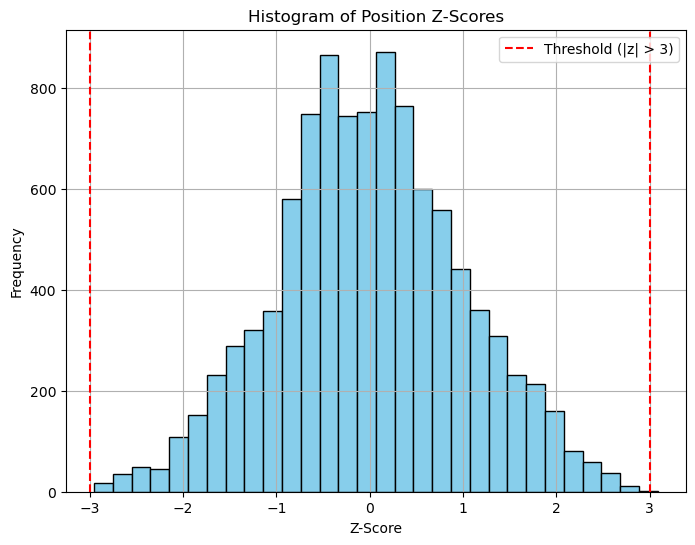

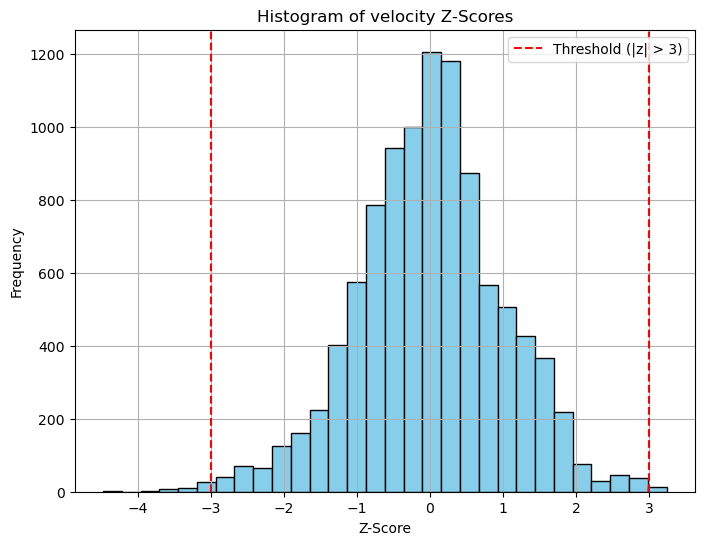

In [36]:
# Example z-scores
z_scores_position = data_normed_df_zscore['z_score_position']

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(z_scores_position, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=3, color='red', linestyle='--', label='Threshold (|z| > 3)')
plt.axvline(x=-3, color='red', linestyle='--')
plt.title('Histogram of Position Z-Scores')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Example z-scores
z_scores_vel = data_normed_df_zscore['z_score_velocity']

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(z_scores_vel, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=3, color='red', linestyle='--', label='Threshold (|z| > 3)')
plt.axvline(x=-3, color='red', linestyle='--')
plt.title('Histogram of velocity Z-Scores')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Using Interpolation

It is important to note that we are assujming that the propagation of TLEs follows a predictable trend which is the case for ISS Zarya\
We can use any significant deviation from this trend to be flagged as an anomaly

In [39]:
data_normed_df_interp = data_normed_df
resampled_df = data_normed_df_interp.resample('T', on='UNIX_TIMESTAMP').mean()
interpolated_df = resampled_df.interpolate(method='linaer')

#compute residuals
data_normed_df_interp['pos_residual'] = data_normed_df_interp['position_magnitude'] - data_normed_df_interp['interp_position_magnitude']
# data_normed_df_interp['vel_residual'] = data_normed_df_interp['velocity_magnitude'] - data_normed_df_interp['interp_velocity_magnitude']
data_normed_df_interp['abs_pos_residual'] = np.abs(data_normed_df_interp['pos_residual']) #absolute residual

#Define a fixed threshold
thresh = 3 * data_normed_df_interp['abs_pos_residual'].std()

#Flag anomalies
data_normed_df_interp['is_anomaly'] = data_normed_df_interp['abs_pos_residual'] > thresh
print(data_normed_df_interp['is_anomaly'])



C:\Users\aleja\AppData\Local\Temp\ipykernel_14092\3207732487.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = data_normed_df_interp.resample('T', on='UNIX_TIMESTAMP').mean()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'